In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/counties-geographic-coordinates/countries.csv
/kaggle/input/suicide-rates-overview-1985-to-2016/master.csv


In [2]:
#pip install plotly==3.10.0

In [3]:
df=pd.read_csv("../input/suicide-rates-overview-1985-to-2016/master.csv")
countries = pd.read_csv("../input/counties-geographic-coordinates/countries.csv")

In [4]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [5]:
df.columns=["country","year","gender","age_group","suicide_number","population","sui_pop","country_year","hdi","gdp_for_year","gdp_per_capita","generation"]

In [6]:
df.drop(["country_year","gdp_for_year","gdp_per_capita","hdi"],axis=1,inplace=True)
df.head()

,country,year,gender,age_group,suicide_number,population,sui_pop,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Boomers


In [7]:
df.age_group.unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

In [8]:
df["age_group"]=df["age_group"].apply(lambda x: str(x).replace('5-14 years','child') if '5-14 years' in str(x) else str(x))
df["age_group"]=df["age_group"].apply(lambda x: str(x).replace('15-24 years','youth') if '15-24 years' in str(x) else str(x))
df["age_group"]=df["age_group"].apply(lambda x: str(x).replace('25-34 years','young adult') if '25-34 years' in str(x) else str(x))
df["age_group"]=df["age_group"].apply(lambda x: str(x).replace('35-54 years','early adult') if '35-54 years' in str(x) else str(x))
df["age_group"]=df["age_group"].apply(lambda x: str(x).replace('55-74 years','adult') if '55-74 years' in str(x) else str(x))
df["age_group"]=df["age_group"].apply(lambda x: str(x).replace('75+ years','senior') if '75+ years' in str(x) else str(x))

In [9]:
df.head()

,country,year,gender,age_group,suicide_number,population,sui_pop,generation
0,Albania,1987,male,youth,21,312900,6.71,Generation X
1,Albania,1987,male,early adult,16,308000,5.19,Silent
2,Albania,1987,female,youth,14,289700,4.83,Generation X
3,Albania,1987,male,senior,1,21800,4.59,G.I. Generation
4,Albania,1987,male,young adult,9,274300,3.28,Boomers


In [10]:
df.tail()

,country,year,gender,age_group,suicide_number,population,sui_pop,generation
27815,Uzbekistan,2014,female,early adult,107,3620833,2.96,Generation X
27816,Uzbekistan,2014,female,senior,9,348465,2.58,Silent
27817,Uzbekistan,2014,male,child,60,2762158,2.17,Generation Z
27818,Uzbekistan,2014,female,child,44,2631600,1.67,Generation Z
27819,Uzbekistan,2014,female,adult,21,1438935,1.46,Boomers


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 8 columns):
country           27820 non-null object
year              27820 non-null int64
gender            27820 non-null object
age_group         27820 non-null object
suicide_number    27820 non-null int64
population        27820 non-null int64
sui_pop           27820 non-null float64
generation        27820 non-null object
dtypes: float64(1), int64(3), object(4)
memory usage: 1.7+ MB


In [12]:
df.shape

(27820, 8)

In [13]:
df.describe()

,year,suicide_number,population,sui_pop
count,27820.000000,27820.000000,2.782000e+04,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097
std,8.469055,902.047917,3.911779e+06,18.961511
min,1985.000000,0.000000,2.780000e+02,0.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000
50%,2002.000000,25.000000,4.301500e+05,5.990000
75%,2008.000000,131.000000,1.486143e+06,16.620000
max,2016.000000,22338.000000,4.380521e+07,224.970000


In [14]:
df.isnull().sum()

country           0
year              0
gender            0
age_group         0
suicide_number    0
population        0
sui_pop           0
generation        0
dtype: int64

In [15]:
df.isnull().sum()

country           0
year              0
gender            0
age_group         0
suicide_number    0
population        0
sui_pop           0
generation        0
dtype: int64

In [16]:
df.head()

,country,year,gender,age_group,suicide_number,population,sui_pop,generation
0,Albania,1987,male,youth,21,312900,6.71,Generation X
1,Albania,1987,male,early adult,16,308000,5.19,Silent
2,Albania,1987,female,youth,14,289700,4.83,Generation X
3,Albania,1987,male,senior,1,21800,4.59,G.I. Generation
4,Albania,1987,male,young adult,9,274300,3.28,Boomers


In [17]:
df = df.sort_values(by=["suicide_number","age_group"], ascending=False)
df['rank']=tuple(zip(df.suicide_number,df.age_group))
df['rank']=df.groupby('suicide_number',sort=False)['rank'].apply(lambda x : pd.Series(pd.factorize(x)[0])).values
df.head()

,country,year,gender,age_group,suicide_number,population,sui_pop,generation,rank
20996,Russian Federation,1994,male,early adult,22338,19044200,117.30,Boomers,0
21008,Russian Federation,1995,male,early adult,21706,19249600,112.76,Boomers,0
21080,Russian Federation,2001,male,early adult,21262,21476420,99.00,Boomers,0
21068,Russian Federation,2000,male,early adult,21063,21378098,98.53,Boomers,0
21057,Russian Federation,1999,male,early adult,20705,21016400,98.52,Boomers,0


In [18]:
df.reset_index(inplace=True,drop=True)
df.head()

,country,year,gender,age_group,suicide_number,population,sui_pop,generation,rank
0,Russian Federation,1994,male,early adult,22338,19044200,117.30,Boomers,0
1,Russian Federation,1995,male,early adult,21706,19249600,112.76,Boomers,0
2,Russian Federation,2001,male,early adult,21262,21476420,99.00,Boomers,0
3,Russian Federation,2000,male,early adult,21063,21378098,98.53,Boomers,0
4,Russian Federation,1999,male,early adult,20705,21016400,98.52,Boomers,0


In [19]:
df["gender"].value_counts()

male      13910
female    13910
Name: gender, dtype: int64

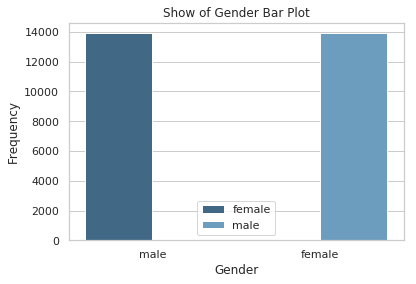

In [20]:
#Gender show bar plot
sns.set(style='whitegrid')
ax=sns.barplot(x=df['gender'].value_counts().index,y=df['gender'].value_counts().values,palette="Blues_d",hue=['female','male'])
plt.legend(loc=8)
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Show of Gender Bar Plot')
plt.show()

In [21]:
df["age_group"].value_counts()

early adult    4642
senior         4642
young adult    4642
adult          4642
youth          4642
child          4610
Name: age_group, dtype: int64

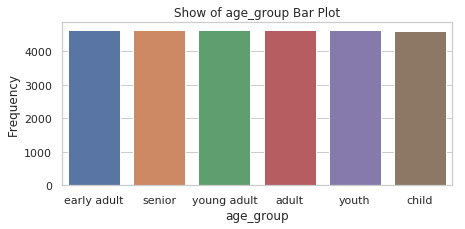

In [22]:
plt.figure(figsize=(7,3))
sns.barplot(x=df['age_group'].value_counts().index,
              y=df['age_group'].value_counts().values)
plt.xlabel('age_group')
plt.ylabel('Frequency')
plt.title('Show of age_group Bar Plot')
plt.show()

In [23]:
df["generation"].value_counts()

Generation X       6408
Silent             6364
Millenials         5844
Boomers            4990
G.I. Generation    2744
Generation Z       1470
Name: generation, dtype: int64

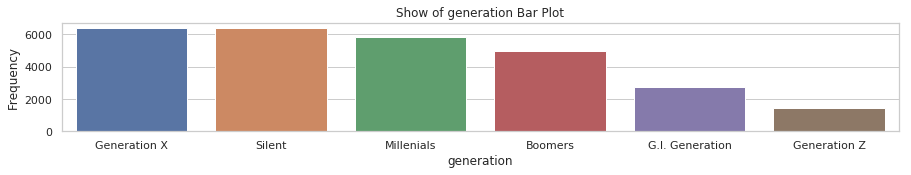

In [24]:
plt.figure(figsize=(15,2))
sns.barplot(x=df['generation'].value_counts().index,
              y=df['generation'].value_counts().values)
plt.xlabel('generation')
plt.ylabel('Frequency')
plt.title('Show of generation Bar Plot')
plt.show()

In [25]:
df.nunique()

country             101
year                 32
gender                2
age_group             6
suicide_number     2084
population        25564
sui_pop            5298
generation            6
rank                  6
dtype: int64

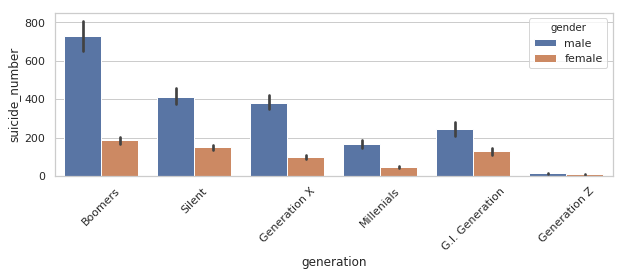

In [26]:
plt.figure(figsize=(10,3))
sns.barplot(x = "generation", y = "suicide_number", hue = "gender", data = df)
plt.xticks(rotation=45)
plt.show()

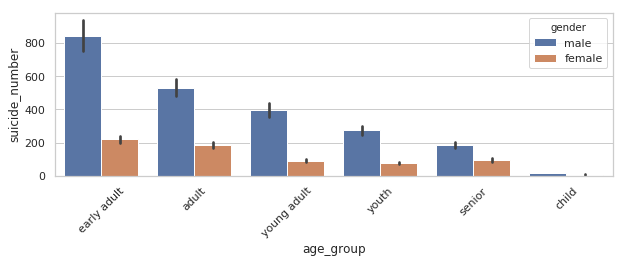

In [27]:
plt.figure(figsize=(10,3))
sns.barplot(x = "age_group", y = "suicide_number", hue = "gender", data = df)
plt.xticks(rotation=45)
plt.show()

<Figure size 864x504 with 0 Axes>

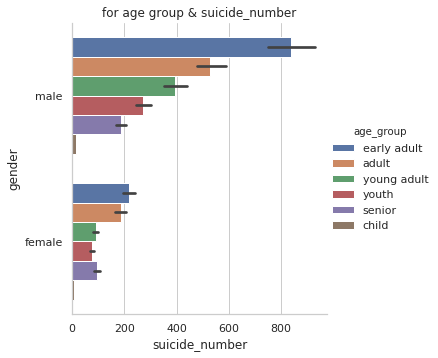

In [28]:
plt.figure(figsize=(12,7))
sns.catplot(y="gender", x="suicide_number",
                 hue="age_group",
                 data=df, kind="bar")
plt.title('for age group & suicide_number')
plt.show()

<Figure size 720x720 with 0 Axes>

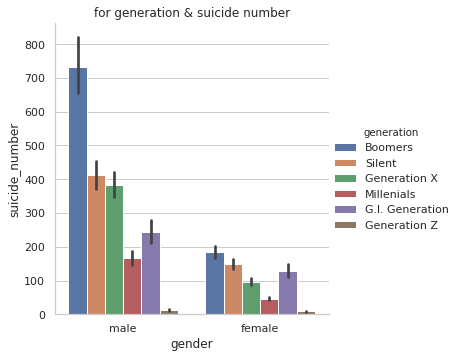

In [29]:
plt.figure(figsize=(10,10))
sns.catplot(x="gender", y="suicide_number",
                 hue="generation",
                 data=df, kind="bar")
plt.title('for generation & suicide number')
plt.show()

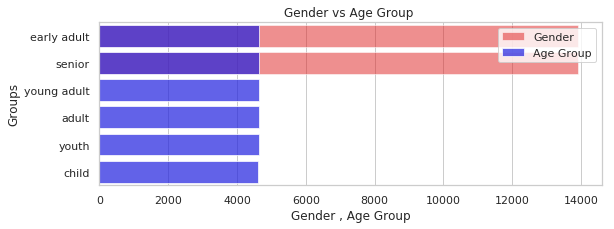

In [30]:
f,ax=plt.subplots(figsize=(9,3))
sns.barplot(x=df['gender'].value_counts().values,y=df['gender'].value_counts().index,alpha=0.5,color='red',label='Gender')
sns.barplot(x=df['age_group'].value_counts().values,y=df['age_group'].value_counts().index,color='blue',alpha=0.7,label='Age Group')
ax.legend(loc='upper right',frameon=True)
ax.set(xlabel='Gender , Age Group',ylabel='Groups',title="Gender vs Age Group ")
plt.show()

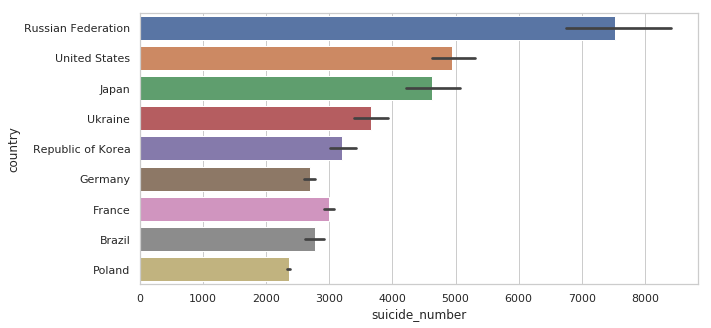

In [31]:
plt.figure(figsize=(10,5))
sns.barplot(df.suicide_number[:600],df.country[:600])
plt.show()

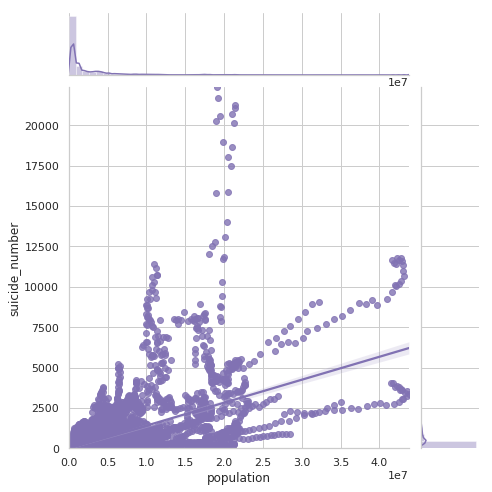

In [32]:
g = sns.jointplot("population", "suicide_number", data=df, kind="reg",
                  xlim=(260, 43805220), ylim=(0, 22340), color="m", height=7)

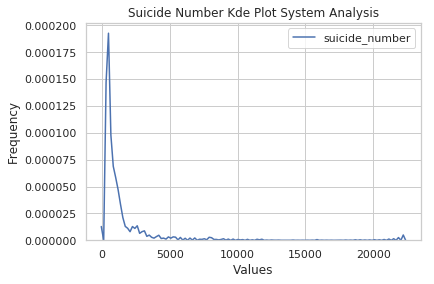

In [33]:
sns.kdeplot(df['suicide_number'])
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Suicide Number Kde Plot System Analysis')
plt.show()

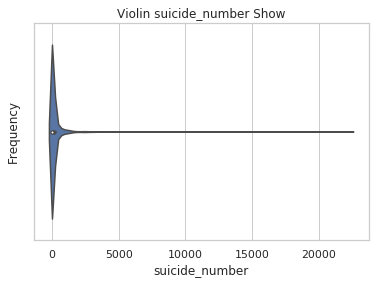

In [34]:
sns.violinplot(df['suicide_number'])
plt.xlabel('suicide_number')
plt.ylabel('Frequency')
plt.title('Violin suicide_number Show')
plt.show()

In [35]:
df.head()

,country,year,gender,age_group,suicide_number,population,sui_pop,generation,rank
0,Russian Federation,1994,male,early adult,22338,19044200,117.30,Boomers,0
1,Russian Federation,1995,male,early adult,21706,19249600,112.76,Boomers,0
2,Russian Federation,2001,male,early adult,21262,21476420,99.00,Boomers,0
3,Russian Federation,2000,male,early adult,21063,21378098,98.53,Boomers,0
4,Russian Federation,1999,male,early adult,20705,21016400,98.52,Boomers,0


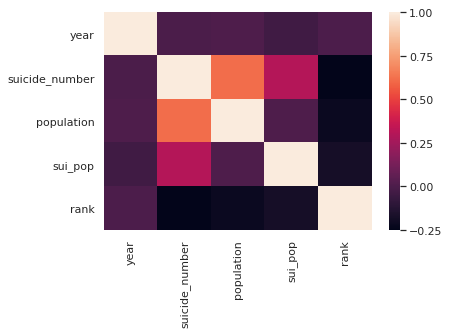

In [36]:
sns.heatmap(df.corr())
plt.show()

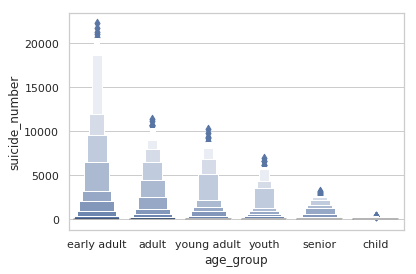

In [37]:
sns.boxenplot(x="age_group", y="suicide_number",
              color="b",
              scale="linear", data=df)
plt.show()

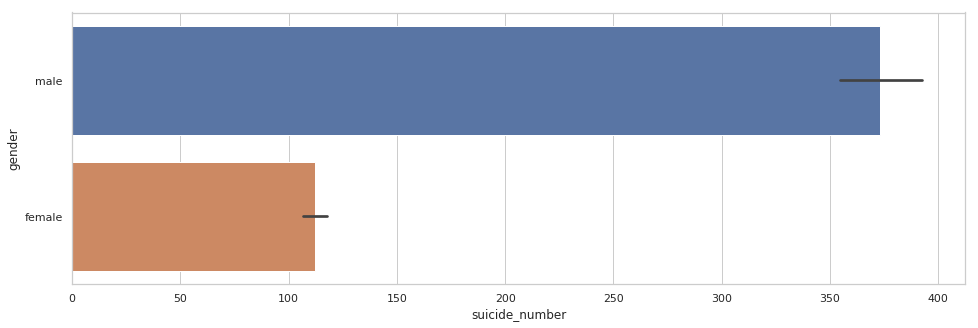

In [38]:
plt.figure(figsize=(16,5))
sns.barplot(df.suicide_number,df.gender)
plt.show()

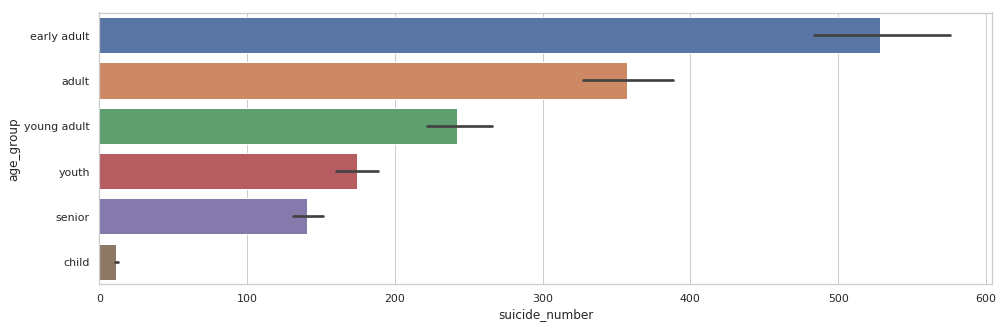

In [39]:
plt.figure(figsize=(16,5))
sns.barplot(df.suicide_number,df.age_group)
plt.show()

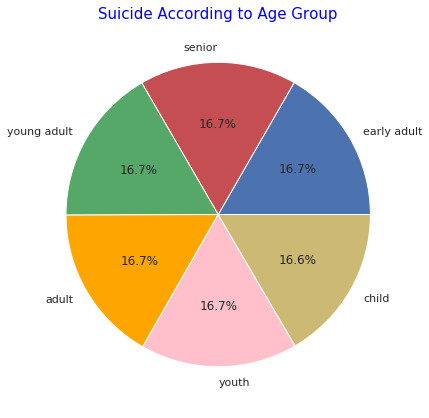

In [40]:
df.age_group.dropna(inplace = True)
labels = df.age_group.value_counts().index
colors = ['b','r','g','orange','pink','y']
explode = [0,0,0,0,0,0]
sizes = df.age_group.value_counts().values

# visual 
plt.figure(0,figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Suicide According to Age Group',color = 'blue',fontsize = 15)
plt.show()

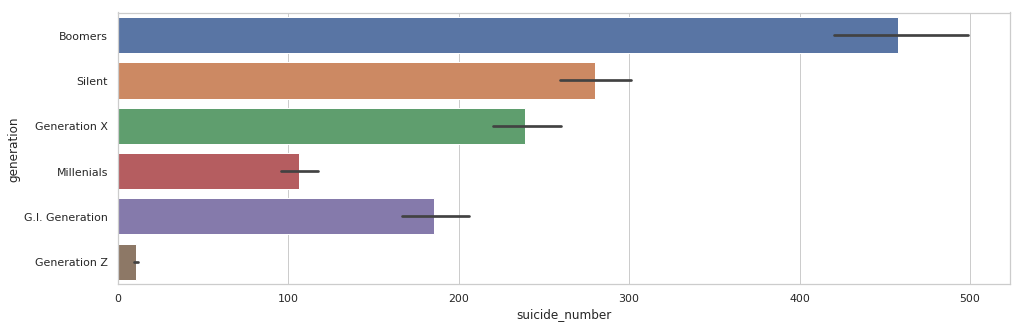

In [41]:
plt.figure(figsize=(16,5))
sns.barplot(df.suicide_number,df.generation)
plt.show()

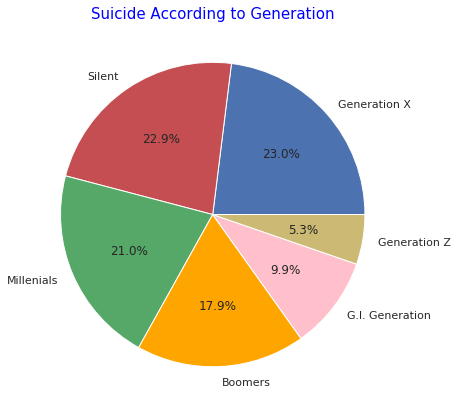

In [42]:
df.generation.dropna(inplace = True)
labels = df.generation.value_counts().index
colors = ['b','r','g','orange','pink','y']
explode = [0,0,0,0,0,0]
sizes = df.generation.value_counts().values

# visual 
plt.figure(0,figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Suicide According to Generation',color = 'blue',fontsize = 15)
plt.show()

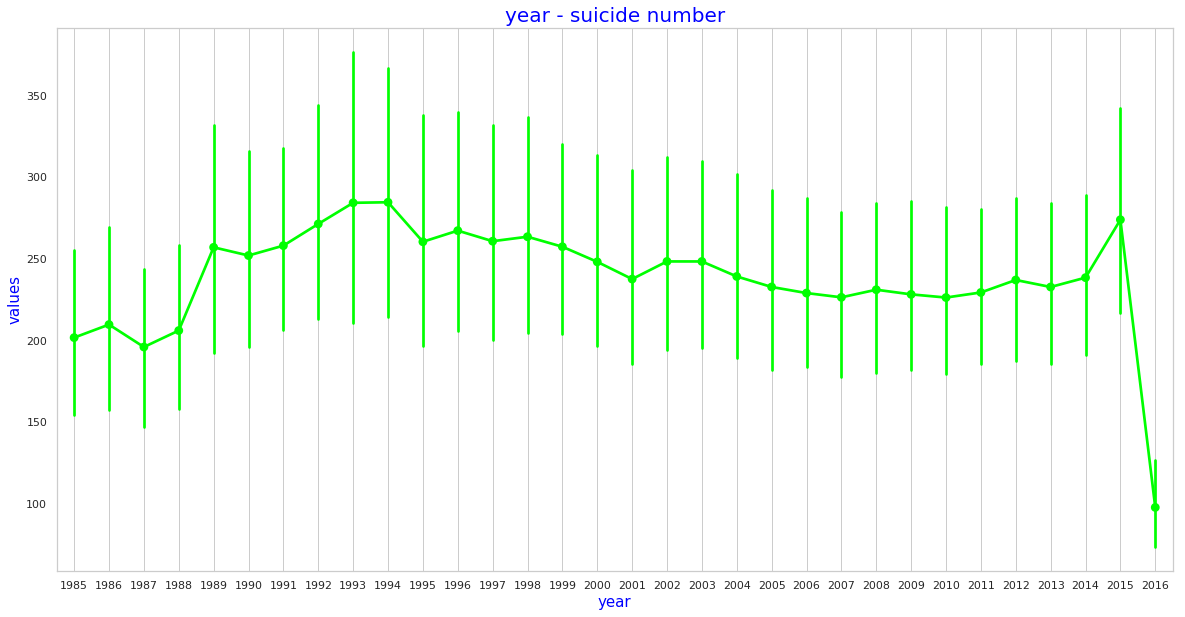

In [43]:
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='year',y='suicide_number',data=df,color='lime',alpha=0.8)
plt.xlabel('year',fontsize = 15,color='blue')
plt.ylabel('values',fontsize = 15,color='blue')
plt.title('year - suicide number',fontsize = 20,color='blue')
plt.grid()

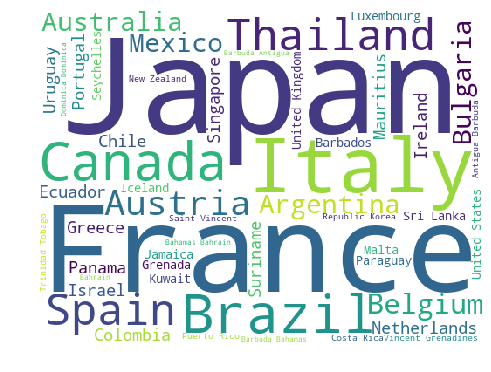

In [44]:
x1985 = df.country[df.year == 1985]
plt.subplots(figsize=(8,8))
wordcloud = WordCloud(
                          background_color='white',
                          width=512,
                          height=384
                         ).generate(" ".join(x1985))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')

plt.show()

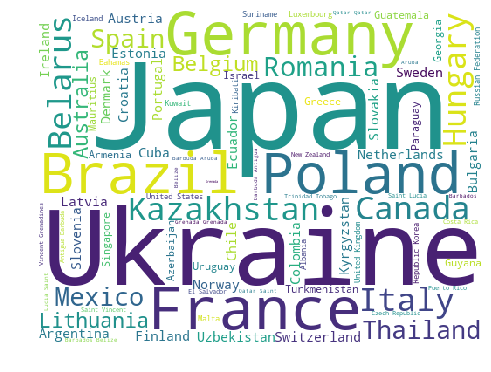

In [45]:
x1995 = df.country[df.year == 1995]
plt.subplots(figsize=(8,8))
wordcloud = WordCloud(
                          background_color='white',
                          width=512,
                          height=384
                         ).generate(" ".join(x1995))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')

plt.show()

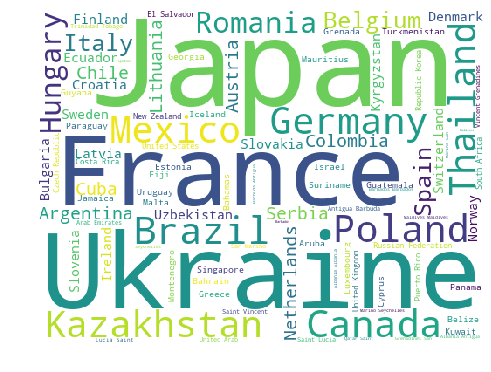

In [46]:
x2005 = df.country[df.year == 2005]
plt.subplots(figsize=(8,8))
wordcloud = WordCloud(
                          background_color='white',
                          width=512,
                          height=384
                         ).generate(" ".join(x2005))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')

plt.show()

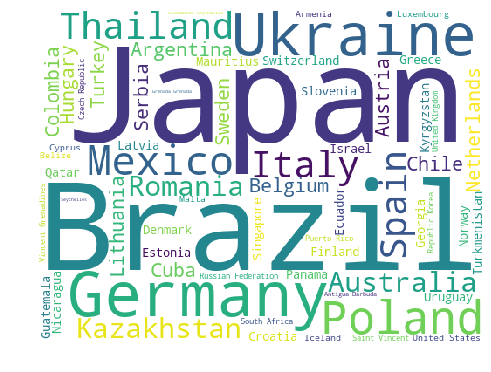

In [47]:
x2015 = df.country[df.year == 2015]
plt.subplots(figsize=(8,8))
wordcloud = WordCloud(
                          background_color='white',
                          width=512,
                          height=384
                         ).generate(" ".join(x2015))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')

plt.show()

<h1>**Prediction**</h1>

In [48]:
df.columns

Index(['country', 'year', 'gender', 'age_group', 'suicide_number',
       'population', 'sui_pop', 'generation', 'rank'],
      dtype='object')

In [49]:
df.corr()

,year,suicide_number,population,sui_pop,rank
year,1.000000,-0.004546,0.008850,-0.039037,0.002487
suicide_number,-0.004546,1.000000,0.616162,0.306604,-0.249757
population,0.008850,0.616162,1.000000,0.008285,-0.213249
sui_pop,-0.039037,0.306604,0.008285,1.000000,-0.180105
rank,0.002487,-0.249757,-0.213249,-0.180105,1.000000


In [50]:
#create a new data frame
data=pd.DataFrame(df.iloc[:,4:6])

data.head(3)

,suicide_number,population
0,22338,19044200
1,21706,19249600
2,21262,21476420


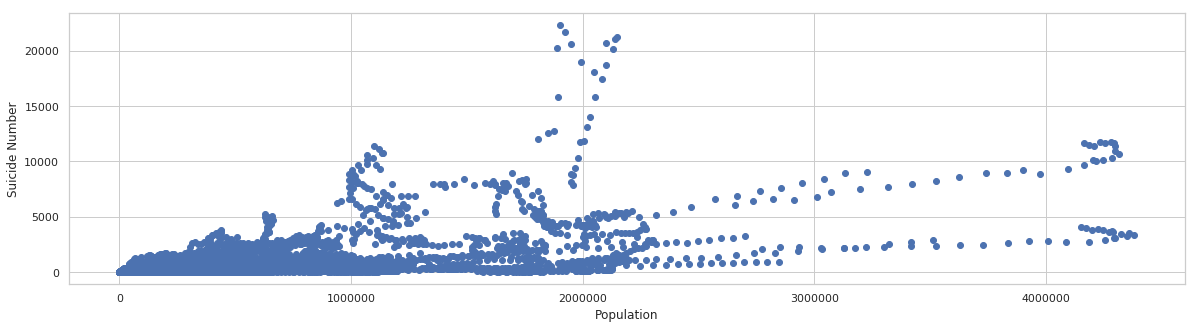

In [51]:
plt.figure(figsize=(20,5))
plt.scatter(data.population*0.1,data.suicide_number)
plt.xlabel("Population")
plt.ylabel("Suicide Number")
plt.show()

<h1>Linear Regression</h1>

In [52]:
from sklearn.linear_model import LinearRegression

linear_reg=LinearRegression()

x=data.population.values.reshape(-1,1)
y=data.suicide_number.values.reshape(-1,1)

linear_reg.fit(x,y)

b0 =linear_reg.intercept_
b1=linear_reg.coef_
print("b0:",b0)
print("b1:",b1)
print("Prediction 5M:",linear_reg.predict([[5000000]]))
print("Prediction 10M:",linear_reg.predict([[10000000]]))
print("Prediction 15M:",linear_reg.predict([[15000000]]))


b0: [-19.54437126]
b1: [[0.00014209]]
Prediction 5M: [[690.88408992]]
Prediction 10M: [[1401.31255109]]
Prediction 15M: [[2111.74101226]]


In [53]:
df.population.min()

278

In [54]:
df.population.max()

43805214

In [55]:
array=np.array([278,5000000,10000000,15000000,20000000,45000000,80000000]).reshape(-1,1)
y_head=linear_reg.predict(array)
print("y_head:",y_head)

y_head: [[  -19.50487143]
 [  690.88408992]
 [ 1401.31255109]
 [ 2111.74101226]
 [ 2822.16947343]
 [ 6374.31177929]
 [11347.31100748]]


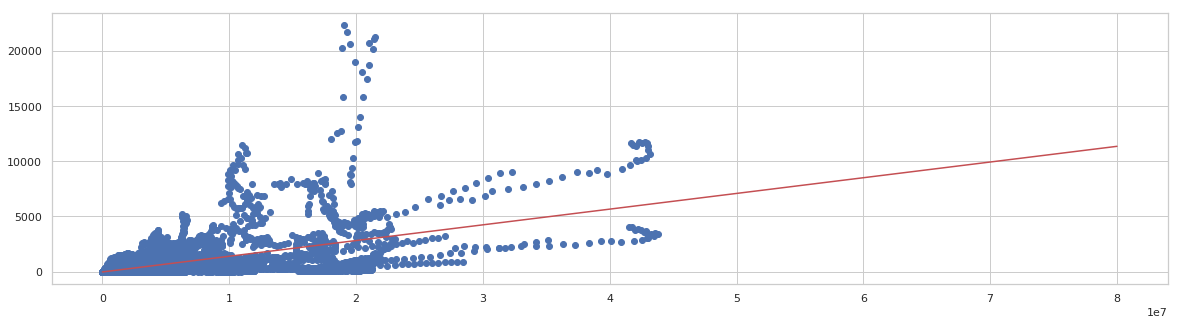

In [56]:
plt.figure(figsize=(20,5))
plt.scatter(x,y)
plt.plot(array,y_head,color='r')
plt.show()

to be continued...